<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/MSc_Final_Year_Dissertation_2024_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit_aer --quiet
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.2 MB/s eta 0:00:00


### Work done till 30th July 2024 to 14th Aug 2024

Shors Algorithm using first random variables and then optimized variables, consecutive

In [ ]:
#Let's take the numbers which we will need to factorize and compare in their terms

# N = [15, 77, 143, 299, 2021, 3913, 10039, 100127]
N = [15, 77, 143]

#Let's make list to store the depths of both the implementation
width1 = []
width2 = []

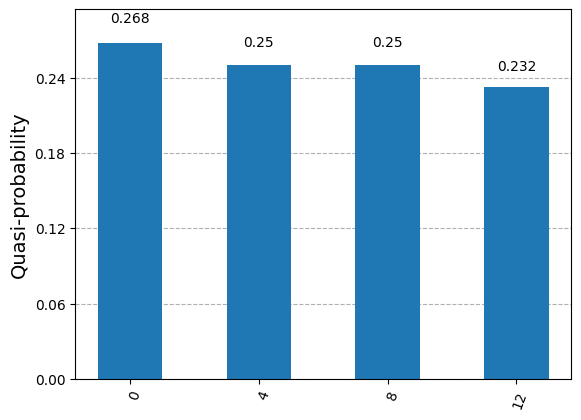

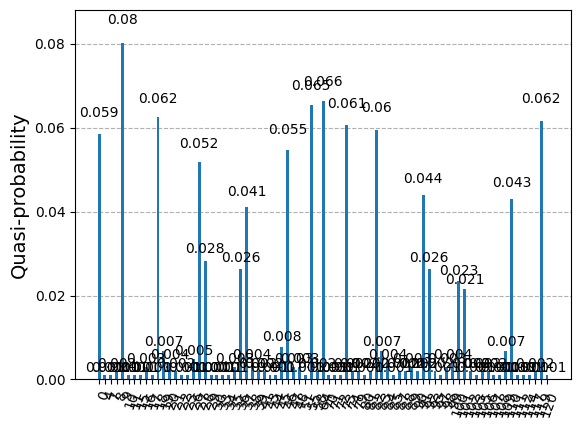

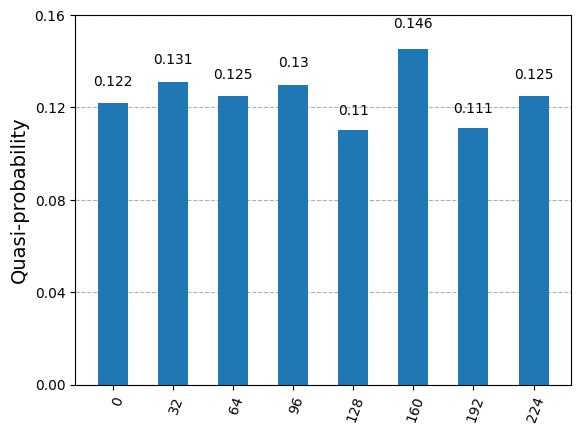

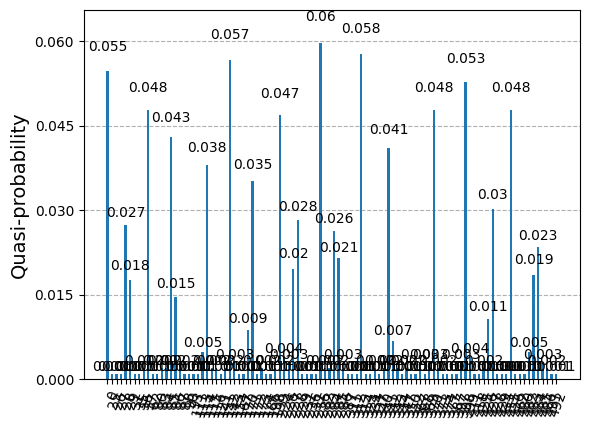

In [ ]:
import random as rand
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer.primitives import Sampler
# from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import math


for i in N:
    N_new = i
    counter = 0
    while True:
        a = rand.randrange(2,N_new)
        counter += 1
        if np.gcd(a,N_new) == 1:
            break

        # Define the value of "a" that will be used to implement the Shor's algorithm

    def toBinary(val):
        binary = ''
        loop = val

        while loop> 0:
            temp = loop % 2
            loop = loop // 2
            binary += str(temp)

        binary = binary[::-1]
        return binary
    def toInteger(val: str):

        num = 0
        val = val[::-1]

        for i in range(len(val)):
            if val[i] == '0':
                continue

            else:
                num += 2**i
        return num

    #Implementing the Unitary Gate
    def opUx(a, power, N_new):
        to_binary = toBinary(N_new) # Generate the binary representation of the test number "N"
        n = len(to_binary)      # From the binary representation, we can determine the number of bits needed to build the circuit

        circuit = QuantumCircuit(n) # Create a new circuit

        for i in range(power):
            for j in range(n-1, 0, -1):
                circuit.swap(j-1, j)     # Swap all the gates linearly
            for j in range(n):
                circuit.x(j)             # Apply an x gate to all the qubits

        circuit.name = f'{a}^{power} mod {N_new}' # Rename the circuit based on the test value and the current power
        # display(circuit.draw('mpl'))
        circuit = circuit.to_gate()
        c_circuit = circuit.control()
        return c_circuit

    N_binary = toBinary(N_new) # Generate the binary representation of the number so that we can generate the number of qubits needed.
    n = len(N_binary)
    m = 2 * n

    circuit = QuantumCircuit(m, n)

    # apply the hadamard gate to the input value
    start_time = time.time()
    for i in range(n):
        circuit.h(i)

    # Helper x gate
    circuit.x(m-1)
    circuit.barrier()
    print()

    # Modify the circuit so that we can install the Controll-ROT gate.
    # opUx implements an instance of the UROT gate per each power basis,
    # and the following loop tells the c_amodN gate which qubits it can
    # apply to.

    for i in range(n):
        circuit.append(opUx(a, 2**i, N_new), [i]+[j+n for j in range(m-n)])

    circuit.barrier()

    qft = QFT(n)
    qft.inverse()
    circuit.append(qft, range(n))

    circuit.measure(range(n), range(n))

    def samplerSimulator(circuit):
        sampler = Sampler()
        results = sampler.run(circuit).result() # create a simulator to test the circuit and get the results from it.
        probabilities = results.quasi_dists # separate the probability of the values
        return probabilities

    # Secondary simulator using the BasicSimulator() class
    def basicSimulator(circuit):
        backend = BasicSimulator()
        tqc = transpile(circuit, backend)
        counts = backend.run(tqc).result().get_counts()
        return counts

    probabilities = samplerSimulator(circuit)

    display(plot_histogram(probabilities))

    def getResultsList(probabilities):
        results_list = []
        for key in probabilities:     # unpack the map
            for j in key:      # get all the measured vectors
                if j == 0:     # if the output is 0, we can discard it since it is not usefult as a period guesser
                    continue
                else:
                    results_list.append(j)
        return results_list


    def printPQ(p, q):

        # The circuit implementation of Shor's algorithm cannot find a value for "p" and "q" if the value of "a"
        # from the start is a factor of the vale "N", thus we can inform the tester about it here
        if N_new % a == 0:
            p = a
            q = N_new // a

        else:
            if p != 0:             # given a value p that is not 0/1, we can find the other value of q, since N = p * q => q = N / p
                q = N_new // p
            elif q != 0:           # given a value q that is not 0/1, we can find the other value of p, since N = p * q => p = N / q
                p = N_new // q


    # i. Extract the list of possible periods "r" from the results of the Quantum Simulation
    r_options = getResultsList(probabilities)

    # Find the values for the factors "p" and "q"
    p = 0
    q = 0
    for i in r_options:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new# Compute the periodicity check by applying modulus arithmetic.
            temp_p = math.gcd(x-1, N_new) # Find the GCD between the value of x-1 and N
            temp_q = math.gcd(x+1, N_new) # Find the GCD between the value of x+1 and N

            # if the values of temp_p and temp_q are 1 or N, then we need to check for other
            # values since they are not our key answers
            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue

    counts = basicSimulator(circuit)
    keys = []
    for i in counts:
        keys.append(i)


    r_candidates = []
    for i in keys:
        if toInteger(i) == 0:
            continue
        else:
            r_candidates.append(toInteger(i))

    p = 0
    q = 0
    for i in r_candidates:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new
            temp_p = math.gcd(x-1, N_new)
            temp_q = math.gcd(x+1, N_new)

            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue


    printPQ(p, q)
    width1.append(circuit.width())




By using the optimized paramters

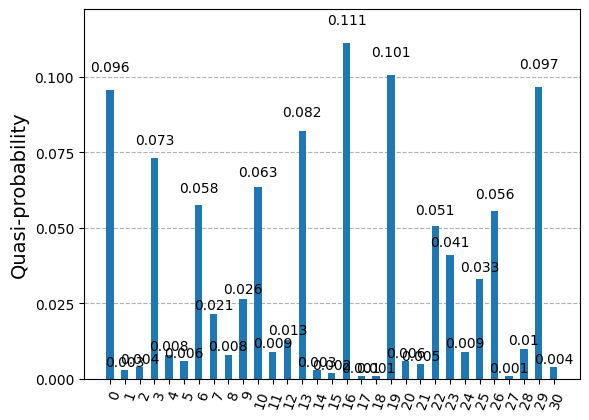

N = 15
Prime Factor 1 = 3
Prime Factor 2 = 5


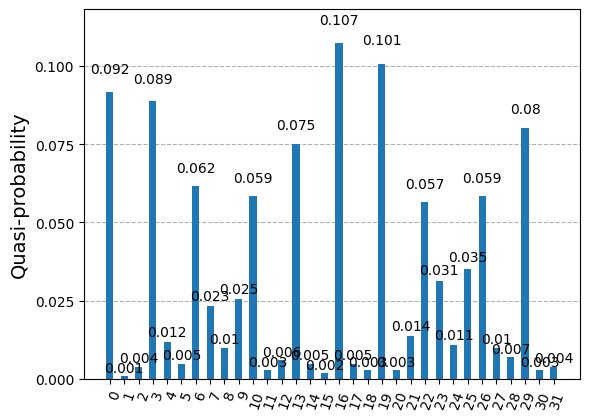

N = 77
Prime Factor 1 = 7
Prime Factor 2 = 11


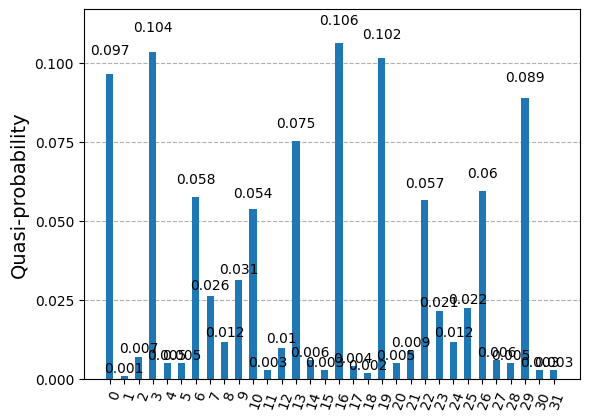

N = 143
Prime Factor 1 = 13
Prime Factor 2 = 11


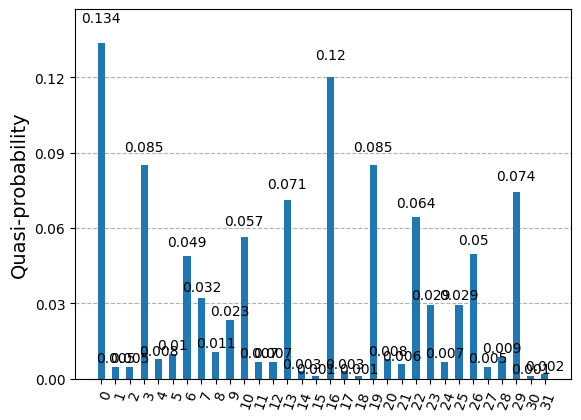

N = 299
Prime Factor 1 = 13
Prime Factor 2 = 23


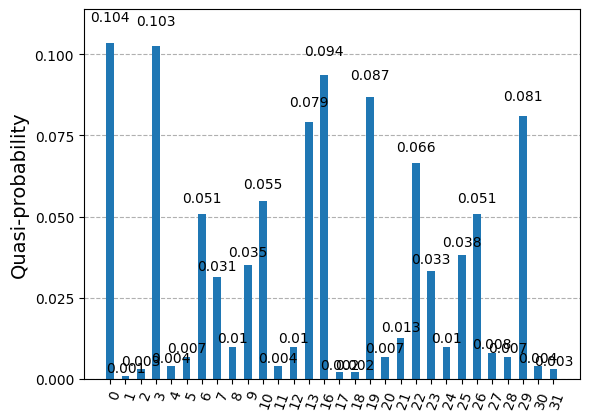

Try a different value for "a"!


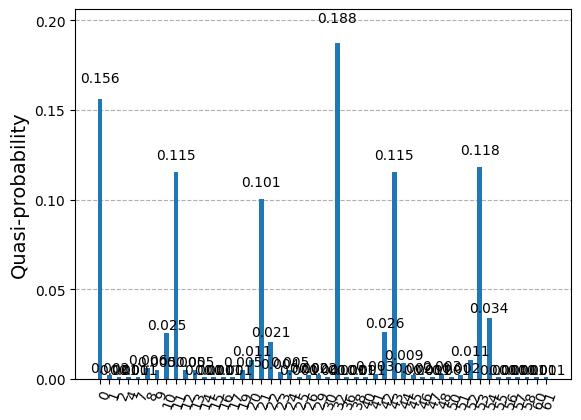

N = 3913
Prime Factor 1 = 7
Prime Factor 2 = 559


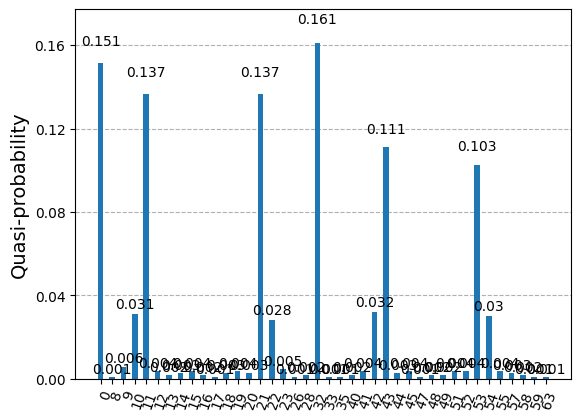

Try a different value for "a"!


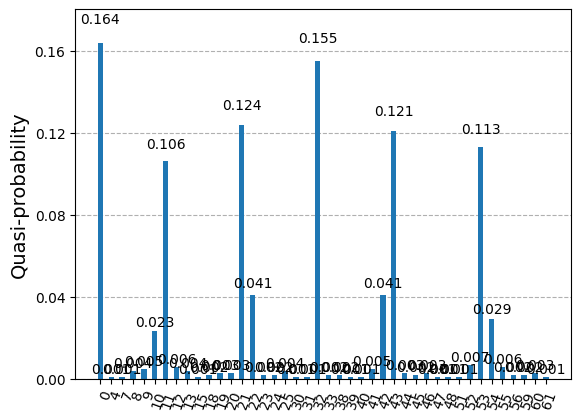

Try a different value for "a"!


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np
import math
from random import randrange

for i in N:

    N_new = i

    counter = 0

    while True:
        a = randrange(2,N_new)
        counter += 1
        if np.gcd(a,N_new) == 1:
            break


    #Choosing the best parameter values for the circuit

    from math import log2, ceil, pi
    e = 0.1

    L = ceil(log2(N_new))
    t = ceil(2*L + 1 + (2+ 1/(2*e)))

    #Following code block is taken as an inspiration
    #Binray representation
    def toBinary(val):
        binary = ''
        loop = val

        while loop> 0:
            temp = loop % 2
            loop = loop // 2
            binary += str(temp)

        binary = binary[::-1]
        return binary

    #Integer representation
    def toInteger(val: str):

        num = 0
        val = val[::-1]

        for i in range(len(val)):
            if val[i] == '0':
                continue

            else:
                num += 2**i
        return num

    #Unitary Gate opUx

    def opUx(a,power,N_new):
        n = len(toBinary(t))
        l = len(toBinary(ceil(log2(N_new))))
        # qreg1 = QuantumRegister(n,"qreg1")
        # qreg2 = QuantumRegister(L,"qreg2")

        # creg = ClassicalRegister(2*L + 1, "creg")

        qc = QuantumCircuit(n)



        for i in range(power):
            for j in range(n-1, 0, -1):
                qc.swap(j-1, j)
            for j in range(n):
                qc.x(j)

        qc.name = f'{a}^{power} mod {N_new}'

        qc = qc.to_gate()
        c_qc = qc.control()

        return c_qc

    n = len(toBinary(t))
    m = 2*n


    circuit = QuantumCircuit(m,n)

    for i in range(n):
        circuit.h(i)

    circuit.x(m-1)
    circuit.barrier()

    for i in range(n):
        circuit.append(opUx(a, 2**i, N_new), [i]+[j+n for j in range(m-n)])

    circuit.barrier()

    qft = QFT(n)
    qft.inverse()
    circuit.append(qft, range(n))

    circuit.measure(range(n), range(n))

    from qiskit.providers.basic_provider import BasicSimulator
    from qiskit_aer.primitives import Sampler

    # Simulation using the sampler class.
    def samplerSimulator(circuit):
        sampler = Sampler()
        results = sampler.run(circuit).result() # create a simulator to test the circuit and get the results from it.
        probabilities = results.quasi_dists # separate the probability of the values
        return probabilities

    # Secondary simulator using the BasicSimulator() class
    def basicSimulator(circuit):
        backend = BasicSimulator()
        tqc = transpile(circuit, backend)
        counts = backend.run(tqc).result().get_counts()
        return counts

    probabilities = samplerSimulator(circuit)
    display(plot_histogram(probabilities))




    def getResultsList(probabilities):
        results_list = []
        for key in probabilities:     # unpack the map
            for j in key:      # get all the measured vectors
                if j == 0:     # if the output is 0, we can discard it since it is not usefult as a period guesser
                    continue
                else:
                    results_list.append(j)
        return results_list

    # def printPQ(p, q):

    #     # The circuit implementation of Shor's algorithm cannot find a value for "p" and "q" if the value of "a"
    #     # from the start is a factor of the vale "N", thus we can inform the tester about it here
    #     if N_new % a == 0:
    #         p = a
    #         q = N_new // a

    #     else:
    #         if p != 0:             # given a value p that is not 0/1, we can find the other value of q, since N = p * q => q = N / p
    #             q = N_new // p
    #         elif q != 0:           # given a value q that is not 0/1, we can find the other value of p, since N = p * q => p = N / q
    #             p = N_new // q

    def printPQ(p, q):

        # The circuit implementation of Shor's algorithm cannot find a value for "p" and "q" if the value of "a"
        # from the start is a factor of the vale "N", thus we can inform the tester about it here
        if N_new % a == 0:
            p = a
            q = N_new // a
            print("The value you chose for \"a\" is a factor of \"N\"!")
            print("N =",N_new)
            print("Prime Factor 1 =",p)
            print("Prime Factor 2 =",q)

        else:
            if p != 0:             # given a value p that is not 0/1, we can find the other value of q, since N = p * q => q = N / p
                q = N_new // p
            elif q != 0:           # given a value q that is not 0/1, we can find the other value of p, since N = p * q => p = N / q
                p = N_new // q

            if p == 0 and q == 0:  # if both p and q are 0, that means that we don't have propper factors, thus search for another value for "a"
                print("Try a different value for \"a\"!")
            else:
                print("N =",N_new)
                print("Prime Factor 1 =",p)
                print("Prime Factor 2 =",q)

        # i. Extract the list of possible periods "r" from the results of the Quantum Simulation
    r_options = getResultsList(probabilities)

    # print("Periodicity from the circuit =>",r_options)

    # Find the values for the factors "p" and "q"
    p = 0
    q = 0
    for i in r_options:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new # Compute the periodicity check by applying modulus arithmetic.
            temp_p = math.gcd(x-1, N_new) # Find the GCD between the value of x-1 and N
            temp_q = math.gcd(x+1, N_new) # Find the GCD between the value of x+1 and N

            # if the values of temp_p and temp_q are 1 or N, then we need to check for other
            # values since they are not our key answers
            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue

    counts = basicSimulator(circuit)
    keys = []
    for i in counts:
        keys.append(i)


    r_candidates = []
    for i in keys:
        if toInteger(i) == 0:
            continue
        else:
            r_candidates.append(toInteger(i))

    p = 0
    q = 0
    for i in r_candidates:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new
            temp_p = math.gcd(x-1, N_new)
            temp_q = math.gcd(x+1, N_new)

            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue


    printPQ(p, q)

    width2.append(circuit.width())

In [ ]:
print(width2)

[15, 15, 15, 15, 15, 18, 18, 18]


Now lets take the example of using optimized parameters from the Pennylane QML model which we can then use to implement using the latest shor's algorithm model and see how it performs

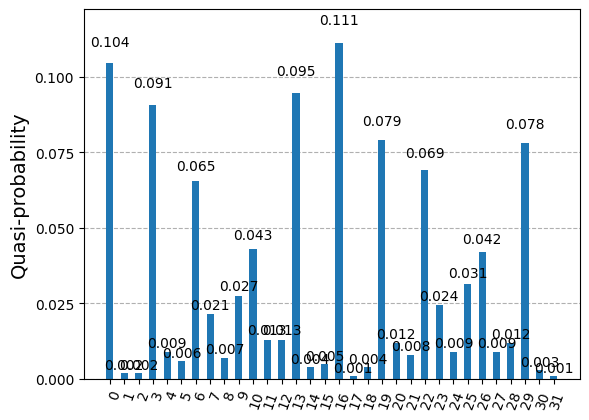

N = 15
Prime Factor 1 = 3
Prime Factor 2 = 5


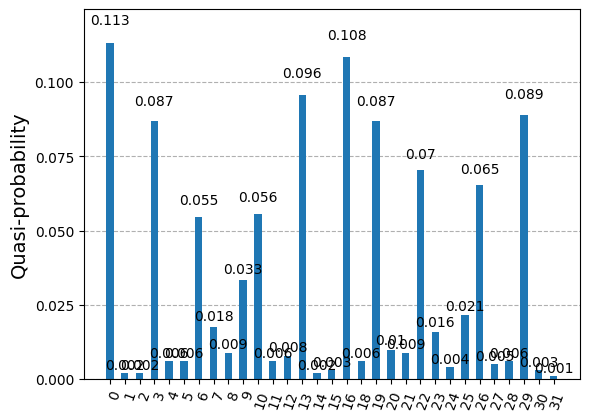

N = 77
Prime Factor 1 = 11
Prime Factor 2 = 7


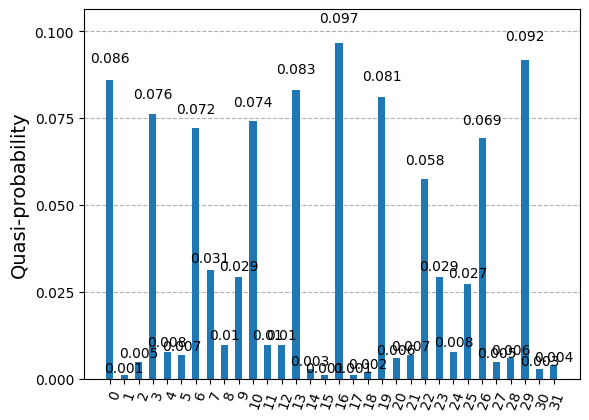

N = 143
Prime Factor 1 = 13
Prime Factor 2 = 11


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np
import math
from random import randrange

for i in N:

    N_new = i

    counter = 0

    while True:
        a = randrange(2,N_new)
        counter += 1
        if np.gcd(a,N_new) == 1:
            break


    #Choosing the best parameter values for the circuit

    from math import log2, ceil, pi
    e = 0.1

    L = ceil(log2(N_new))
    t = ceil(2*L + 1 + (2+ 1/(2*e)))

    #Following code block is taken as an inspiration
    #Binray representation
    def toBinary(val):
        binary = ''
        loop = val

        while loop> 0:
            temp = loop % 2
            loop = loop // 2
            binary += str(temp)

        binary = binary[::-1]
        return binary

    #Integer representation
    def toInteger(val: str):

        num = 0
        val = val[::-1]

        for i in range(len(val)):
            if val[i] == '0':
                continue

            else:
                num += 2**i
        return num

    #Unitary Gate opUx

    def opUx(a,power,N_new):
        n = len(toBinary(t))
        l = len(toBinary(ceil(log2(N_new))))
        # qreg1 = QuantumRegister(n,"qreg1")
        # qreg2 = QuantumRegister(L,"qreg2")

        # creg = ClassicalRegister(2*L + 1, "creg")

        qc = QuantumCircuit(n)



        for i in range(power):
            for j in range(n-1, 0, -1):
                qc.swap(j-1, j)
            for j in range(n):
                qc.x(j)

        qc.name = f'{a}^{power} mod {N_new}'

        qc = qc.to_gate()
        c_qc = qc.control()

        return c_qc

    n = len(toBinary(t))
    m = 2*n


    circuit = QuantumCircuit(m,n)

    for i in range(n):
        circuit.h(i)

    circuit.x(m-1)
    circuit.barrier()

    for i in range(n):
        circuit.append(opUx(a, 2**i, N_new), [i]+[j+n for j in range(m-n)])

    circuit.barrier()

    qft = QFT(n)
    qft.inverse()
    circuit.append(qft, range(n))

    circuit.measure(range(n), range(n))

    # from qiskit.providers.basic_provider import BasicSimulator
    # from qiskit_aer.primitives import Sampler
    from qiskit.providers.fake_provider import GenericBackendV2
    from qiskit_aer.primitives import Sampler



    # Simulation using the sampler class.
    def samplerSimulator(circuit):
        sampler = Sampler()
        results = sampler.run(circuit).result() # create a simulator to test the circuit and get the results from it.
        probabilities = results.quasi_dists # separate the probability of the values
        return probabilities

    # Secondary simulator using the BasicSimulator() class
    def basicSimulator(circuit):
        backend = GenericBackendV2(num_qubits = 24)
        tqc = transpile(circuit, backend)
        counts = backend.run(tqc).result().get_counts()
        return counts

    probabilities = samplerSimulator(circuit)
    display(plot_histogram(probabilities))




    def getResultsList(probabilities):
        results_list = []
        for key in probabilities:     # unpack the map
            for j in key:      # get all the measured vectors
                if j == 0:     # if the output is 0, we can discard it since it is not usefult as a period guesser
                    continue
                else:
                    results_list.append(j)
        return results_list

    # def printPQ(p, q):

    #     # The circuit implementation of Shor's algorithm cannot find a value for "p" and "q" if the value of "a"
    #     # from the start is a factor of the vale "N", thus we can inform the tester about it here
    #     if N_new % a == 0:
    #         p = a
    #         q = N_new // a

    #     else:
    #         if p != 0:             # given a value p that is not 0/1, we can find the other value of q, since N = p * q => q = N / p
    #             q = N_new // p
    #         elif q != 0:           # given a value q that is not 0/1, we can find the other value of p, since N = p * q => p = N / q
    #             p = N_new // q

    def printPQ(p, q):

        # The circuit implementation of Shor's algorithm cannot find a value for "p" and "q" if the value of "a"
        # from the start is a factor of the vale "N", thus we can inform the tester about it here
        if N_new % a == 0:
            p = a
            q = N_new // a
            print("The value you chose for \"a\" is a factor of \"N\"!")
            print("N =",N_new)
            print("Prime Factor 1 =",p)
            print("Prime Factor 2 =",q)

        else:
            if p != 0:             # given a value p that is not 0/1, we can find the other value of q, since N = p * q => q = N / p
                q = N_new // p
            elif q != 0:           # given a value q that is not 0/1, we can find the other value of p, since N = p * q => p = N / q
                p = N_new // q

            if p == 0 and q == 0:  # if both p and q are 0, that means that we don't have propper factors, thus search for another value for "a"
                print("Try a different value for \"a\"!")
            else:
                print("N =",N_new)
                print("Prime Factor 1 =",p)
                print("Prime Factor 2 =",q)

        # i. Extract the list of possible periods "r" from the results of the Quantum Simulation
    r_options = getResultsList(probabilities)

    # print("Periodicity from the circuit =>",r_options)

    # Find the values for the factors "p" and "q"
    p = 0
    q = 0
    for i in r_options:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new # Compute the periodicity check by applying modulus arithmetic.
            temp_p = math.gcd(x-1, N_new) # Find the GCD between the value of x-1 and N
            temp_q = math.gcd(x+1, N_new) # Find the GCD between the value of x+1 and N

            # if the values of temp_p and temp_q are 1 or N, then we need to check for other
            # values since they are not our key answers
            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue

    counts = basicSimulator(circuit)
    keys = []
    for i in counts:
        keys.append(i)


    r_candidates = []
    for i in keys:
        if toInteger(i) == 0:
            continue
        else:
            r_candidates.append(toInteger(i))

    p = 0
    q = 0
    for i in r_candidates:
        if i % 2 == 0:
            x = (a**(i//2)) % N_new
            temp_p = math.gcd(x-1, N_new)
            temp_q = math.gcd(x+1, N_new)

            if temp_p != 1 and temp_p != N_new:
                p = temp_p
            if temp_q != 1 and temp_q != N_new:
                q = temp_q
            else:
                continue
        else:
            continue


    printPQ(p, q)

    width2.append(circuit.width())

In [ ]:
#Let's check the properties of the code
print("The width of the circuit: ",qc.width())
print()
print("The size of the circuit: ", qc.size())
print()
print("The operations inside the circuit: ", qc.count_ops())

Following code is an impelementation of a model to reduce the cost of QFT using Pennylane (please delete it if not needed)

In [ ]:
!pip install pennylane --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00


In [ ]:
# Importing Libraries for Quantum Machine Learning and Visualization

# PennyLane is a library for quSantum machine learning, quantum computing, and quantum chemistry.
# It is used here for creating and optimizing quantum circuits.
import pennylane as qml

# NumPy is a fundamental package for scientific computing with Python.
# We use the version from PennyLane to ensure compatibility with quantum tensors.
from pennylane import numpy as np

# Matplotlib's pyplot is a collection of functions that make matplotlib work like MATLAB.
# It is used here for plotting and visualizing data in a professional manner.
from matplotlib import pyplot as plt

In [ ]:
# Defining the Quantum Circuit for QFT
def qft_circuit(params, num_qubits):
    """
    Constructs the quantum circuit for Quantum Fourier Transform (QFT).

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    np.ndarray: Probability distribution over the quantum states.
    """
    dev = qml.device('default.qubit', wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        for wire in range(num_qubits):
            qml.Hadamard(wires=wire)
            qml.RZ(params[wire], wires=wire)
        qml.adjoint(qml.QFT)(wires=range(num_qubits))
        return qml.probs(wires=range(num_qubits))

    return circuit()

In [ ]:
# Defining the Cost Function
def cost_function(params, target_number, num_qubits):
    """
    Defines the cost function for optimizing the QFT circuit.

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    float: Cost associated with the current state of the circuit.
    """
    desired_state = np.zeros(2**num_qubits)
    desired_state[target_number] = 77
    probabilities = qft_circuit(params, num_qubits)
    return np.sum(np.square(desired_state - probabilities))

In [ ]:
# Optimization Function
def optimize_qft_circuit(num_qubits, target_number, num_steps, lr=0.01):
    """
    Optimizes the QFT circuit using the RMSProp optimizer.

    Args:
    num_qubits (int): Number of qubits in the quantum circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_steps (int): Number of iterations for the optimization process.
    lr (float, optional): Learning rate for the optimizer. Default is 0.01.

    Returns:
    tuple: Optimized parameters, parameter history, cost history, and the final cost value.
    """
    max_target_number = 2**num_qubits - 1
    if target_number > max_target_number:
        raise ValueError(f"Target number {target_number} is out of range for {num_qubits} qubits. It must be in the range [0, {max_target_number}].")

    optimizer = qml.GradientDescentOptimizer(stepsize=lr)
    params = np.zeros(num_qubits)
    param_history = np.empty([num_steps, num_qubits])
    cost_history = np.empty(num_steps)

    for i in range(num_steps):
        params = optimizer.step(lambda p: cost_function(p, target_number, num_qubits), params)
        param_history[i] = params
        cost_history[i] = cost_function(params, target_number, num_qubits)
    # Debugging: Ensure the length of params is correct
    print(f"Initial params: {params}, length: {len(params)}")  # Add this line for debugging
    return params, param_history, cost_history, cost_function(params, target_number, num_qubits)


In [ ]:
def plot_opt_surface(cost_arr, params, m, cost, n=200):
    # Data array
    theta1 = np.linspace(-2*np.pi, 2*np.pi, n)
    theta2 = np.linspace(-2*np.pi, 2*np.pi, n)
    # Grid of elements
    X, Y = np.meshgrid(theta1, theta2)
    # Cost function on grid
    z = []
    for y in Y:
        for x in X[0]:
            z.append(cost([x, y[0]]))
    Z = np.reshape(z, (n, n))

    #Plotting the cost function of grid
    fig = plt.figure(figsize = (9,9))
    ax = fig.add_subplot(projection='3d')
    ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, edgecolor = 'grey', linewidth=0.5)

    # Plotting the optimization result
    param1, param2 = np.split(params,2, axis = 1)
    ax.scatter(param1, param2, cost_arr, c = 'red', s = 20, marker = 'o')

    # Set labels
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel('Cost')
    ax.set_title(r'Optimization of Quantum Circuit Using RMSProp Optimizer')
    ax.legend(('Grid of cost function', 'Optimization results'))

In [ ]:
# Using the Optimized QFT Circuit
# Setting parameters for the quantum Fourier transform
num_qubits = 10 # Number of qubits
target_number = 77  # Target number for QFT
num_steps = 1000  # Number of optimization steps
learning_rate = 0.01  # Learning rate for the optimizer

# Optimizing the QFT circuit
optimized_params, param_history, cost_history, final_cost = optimize_qft_circuit(
    num_qubits, target_number, num_steps, learning_rate
)

# Displaying the results of the optimization
print(f"Optimized rotation angles: {optimized_params}")
print(f"Final cost value: {final_cost}")

Initial params: [ 5.51570886e-14  1.05035536e-29 -1.90227784e-29 -4.54947653e-30
  2.36067494e-29  8.30232678e-30 -2.50933749e-29  4.86033934e-30
  5.92563808e-30 -2.00280780e-30], length: 10
Optimized rotation angles: [ 5.51570886e-14  1.05035536e-29 -1.90227784e-29 -4.54947653e-30
  2.36067494e-29  8.30232678e-30 -2.50933749e-29  4.86033934e-30
  5.92563808e-30 -2.00280780e-30]
Final cost value: 5930.0


Considering some 2 digit numbers such as, 2,3,4,7,8 etc kind of

For 7

In [ ]:
# Importing Libraries for Quantum Machine Learning and Visualization

# PennyLane is a library for quSantum machine learning, quantum computing, and quantum chemistry.
# It is used here for creating and optimizing quantum circuits.
import pennylane as qml

# NumPy is a fundamental package for scientific computing with Python.
# We use the version from PennyLane to ensure compatibility with quantum tensors.
from pennylane import numpy as np

# Matplotlib's pyplot is a collection of functions that make matplotlib work like MATLAB.
# It is used here for plotting and visualizing data in a professional manner.
from matplotlib import pyplot as plt

# Defining the Quantum Circuit for QFT
def qft_circuit(params, num_qubits):
    """
    Constructs the quantum circuit for Quantum Fourier Transform (QFT).

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    np.ndarray: Probability distribution over the quantum states.
    """
    dev = qml.device('default.qubit', wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        for wire in range(num_qubits):
            qml.Hadamard(wires=wire)
            qml.RZ(params[wire], wires=wire)
        qml.adjoint(qml.QFT)(wires=range(num_qubits))
        return qml.probs(wires=range(num_qubits))

    return circuit()

# Defining the Cost Function
def cost_function(params, target_number, num_qubits):
    """
    Defines the cost function for optimizing the QFT circuit.

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    float: Cost associated with the current state of the circuit.
    """
    desired_state = np.zeros(2**num_qubits)
    desired_state[target_number] = 7
    probabilities = qft_circuit(params, num_qubits)
    return np.sum(np.square(desired_state - probabilities))


# Optimization Function
def optimize_qft_circuit(num_qubits, target_number, num_steps, lr=0.01):
    """
    Optimizes the QFT circuit using the RMSProp optimizer.

    Args:
    num_qubits (int): Number of qubits in the quantum circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_steps (int): Number of iterations for the optimization process.
    lr (float, optional): Learning rate for the optimizer. Default is 0.01.

    Returns:
    tuple: Optimized parameters, parameter history, cost history, and the final cost value.
    """
    max_target_number = 2**num_qubits - 1
    if target_number > max_target_number:
        raise ValueError(f"Target number {target_number} is out of range for {num_qubits} qubits. It must be in the range [0, {max_target_number}].")

    optimizer = qml.GradientDescentOptimizer(stepsize=lr)
    params = np.zeros(num_qubits)
    param_history = np.empty([num_steps, num_qubits])
    cost_history = np.empty(num_steps)

    for i in range(num_steps):
        params = optimizer.step(lambda p: cost_function(p, target_number, num_qubits), params)
        param_history[i] = params
        cost_history[i] = cost_function(params, target_number, num_qubits)
    # Debugging: Ensure the length of params is correct
    print(f"Initial params: {params}, length: {len(params)}")  # Add this line for debugging
    return params, param_history, cost_history, cost_function(params, target_number, num_qubits)

# Using the Optimized QFT Circuit
# Setting parameters for the quantum Fourier transform
num_qubits = 4 # Number of qubits
target_number = 7  # Target number for QFT
num_steps = 1000  # Number of optimization steps
learning_rate = 0.01  # Learning rate for the optimizer

# Optimizing the QFT circuit
optimized_params, param_history, cost_history, final_cost = optimize_qft_circuit(
    num_qubits, target_number, num_steps, learning_rate
)

# Displaying the results of the optimization
print(f"Optimized rotation angles: {optimized_params}")
print(f"Final cost value: {final_cost}")


Initial params: [-9.93611246e-14 -4.45194604e-28 -1.86451589e-28  2.28454055e-27], length: 4
Optimized rotation angles: [-9.93611246e-14 -4.45194604e-28 -1.86451589e-28  2.28454055e-27]
Final cost value: 50.0


For 14

In [ ]:
# Importing Libraries for Quantum Machine Learning and Visualization

# PennyLane is a library for quSantum machine learning, quantum computing, and quantum chemistry.
# It is used here for creating and optimizing quantum circuits.
import pennylane as qml

# NumPy is a fundamental package for scientific computing with Python.
# We use the version from PennyLane to ensure compatibility with quantum tensors.
from pennylane import numpy as np

# Matplotlib's pyplot is a collection of functions that make matplotlib work like MATLAB.
# It is used here for plotting and visualizing data in a professional manner.
from matplotlib import pyplot as plt

# Defining the Quantum Circuit for QFT
def qft_circuit(params, num_qubits):
    """
    Constructs the quantum circuit for Quantum Fourier Transform (QFT).

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    np.ndarray: Probability distribution over the quantum states.
    """
    dev = qml.device('default.qubit', wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        for wire in range(num_qubits):
            qml.Hadamard(wires=wire)
            qml.RZ(params[wire], wires=wire)
        qml.adjoint(qml.QFT)(wires=range(num_qubits))
        return qml.probs(wires=range(num_qubits))

    return circuit()

# Defining the Cost Function
def cost_function(params, target_number, num_qubits):
    """
    Defines the cost function for optimizing the QFT circuit.

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    float: Cost associated with the current state of the circuit.
    """
    desired_state = np.zeros(2**num_qubits)
    desired_state[target_number] = 14
    probabilities = qft_circuit(params, num_qubits)
    return np.sum(np.square(desired_state - probabilities))


# Optimization Function
def optimize_qft_circuit(num_qubits, target_number, num_steps, lr=0.01):
    """
    Optimizes the QFT circuit using the RMSProp optimizer.

    Args:
    num_qubits (int): Number of qubits in the quantum circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_steps (int): Number of iterations for the optimization process.
    lr (float, optional): Learning rate for the optimizer. Default is 0.01.

    Returns:
    tuple: Optimized parameters, parameter history, cost history, and the final cost value.
    """
    max_target_number = 2**num_qubits - 1
    if target_number > max_target_number:
        raise ValueError(f"Target number {target_number} is out of range for {num_qubits} qubits. It must be in the range [0, {max_target_number}].")

    optimizer = qml.GradientDescentOptimizer(stepsize=lr)
    params = np.zeros(num_qubits)
    param_history = np.empty([num_steps, num_qubits])
    cost_history = np.empty(num_steps)

    for i in range(num_steps):
        params = optimizer.step(lambda p: cost_function(p, target_number, num_qubits), params)
        param_history[i] = params
        cost_history[i] = cost_function(params, target_number, num_qubits)
    # Debugging: Ensure the length of params is correct
    print(f"Initial params: {params}, length: {len(params)}")  # Add this line for debugging
    return params, param_history, cost_history, cost_function(params, target_number, num_qubits)

# Using the Optimized QFT Circuit
# Setting parameters for the quantum Fourier transform
num_qubits = 5 # Number of qubits
target_number = 14  # Target number for QFT
num_steps = 1000  # Number of optimization steps
learning_rate = 0.01  # Learning rate for the optimizer

# Optimizing the QFT circuit
optimized_params, param_history, cost_history, final_cost = optimize_qft_circuit(
    num_qubits, target_number, num_steps, learning_rate
)

# Displaying the results of the optimization
print(f"Optimized rotation angles: {optimized_params}")
print(f"Final cost value: {final_cost}")


Initial params: [ 0.00000000e+00 -1.99687704e-13 -3.08933076e-27 -1.27908582e-27
  1.55007725e-26], length: 5
Optimized rotation angles: [ 0.00000000e+00 -1.99687704e-13 -3.08933076e-27 -1.27908582e-27
  1.55007725e-26]
Final cost value: 197.0


Suppose the target number is 21

In [ ]:
# Importing Libraries for Quantum Machine Learning and Visualization

# PennyLane is a library for quSantum machine learning, quantum computing, and quantum chemistry.
# It is used here for creating and optimizing quantum circuits.
import pennylane as qml

# NumPy is a fundamental package for scientific computing with Python.
# We use the version from PennyLane to ensure compatibility with quantum tensors.
from pennylane import numpy as np

# Matplotlib's pyplot is a collection of functions that make matplotlib work like MATLAB.
# It is used here for plotting and visualizing data in a professional manner.
from matplotlib import pyplot as plt

# Defining the Quantum Circuit for QFT
def qft_circuit(params, num_qubits):
    """
    Constructs the quantum circuit for Quantum Fourier Transform (QFT).

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    np.ndarray: Probability distribution over the quantum states.
    """
    dev = qml.device('default.qubit', wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        for wire in range(num_qubits):
            qml.Hadamard(wires=wire)
            qml.RZ(params[wire], wires=wire)
        qml.adjoint(qml.QFT)(wires=range(num_qubits))
        return qml.probs(wires=range(num_qubits))

    return circuit()

# Defining the Cost Function
def cost_function(params, target_number, num_qubits):
    """
    Defines the cost function for optimizing the QFT circuit.

    Args:
    params (np.ndarray): Parameters for the variational circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_qubits (int): Number of qubits in the circuit.

    Returns:
    float: Cost associated with the current state of the circuit.
    """
    desired_state = np.zeros(2**num_qubits)
    desired_state[target_number] = 21
    probabilities = qft_circuit(params, num_qubits)
    return np.sum(np.square(desired_state - probabilities))


# Optimization Function
def optimize_qft_circuit(num_qubits, target_number, num_steps, lr=0.01):
    """
    Optimizes the QFT circuit using the RMSProp optimizer.

    Args:
    num_qubits (int): Number of qubits in the quantum circuit.
    target_number (int): Target number for QFT, in the range [0, 2^num_qubits - 1].
    num_steps (int): Number of iterations for the optimization process.
    lr (float, optional): Learning rate for the optimizer. Default is 0.01.

    Returns:
    tuple: Optimized parameters, parameter history, cost history, and the final cost value.
    """
    max_target_number = 2**num_qubits - 1
    if target_number > max_target_number:
        raise ValueError(f"Target number {target_number} is out of range for {num_qubits} qubits. It must be in the range [0, {max_target_number}].")

    optimizer = qml.GradientDescentOptimizer(stepsize=lr)
    params = np.zeros(num_qubits)
    param_history = np.empty([num_steps, num_qubits])
    cost_history = np.empty(num_steps)

    for i in range(num_steps):
        params = optimizer.step(lambda p: cost_function(p, target_number, num_qubits), params)
        param_history[i] = params
        cost_history[i] = cost_function(params, target_number, num_qubits)
    # Debugging: Ensure the length of params is correct
    print(f"Initial params: {params}, length: {len(params)}")  # Add this line for debugging
    return params, param_history, cost_history, cost_function(params, target_number, num_qubits)

# Using the Optimized QFT Circuit
# Setting parameters for the quantum Fourier transform
num_qubits = 5 # Number of qubits
target_number = 21  # Target number for QFT
num_steps = 1000  # Number of optimization steps
learning_rate = 0.01  # Learning rate for the optimizer

# Optimizing the QFT circuit
optimized_params, param_history, cost_history, final_cost = optimize_qft_circuit(
    num_qubits, target_number, num_steps, learning_rate
)

# Displaying the results of the optimization
print(f"Optimized rotation angles: {optimized_params}")
print(f"Final cost value: {final_cost}")


Initial params: [-6.77462921e-46 -1.10038160e-62 -1.14410465e-63 -1.04482422e-62
  1.12326298e-62], length: 5
Optimized rotation angles: [-6.77462921e-46 -1.10038160e-62 -1.14410465e-63 -1.04482422e-62
  1.12326298e-62]
Final cost value: 442.0
